
image 1/1 /home/ubuntu-pc/fp/img/custa.jpg: 640x480 1 Welsh_springer_spaniel, 43.0ms
Speed: 37.5ms preprocess, 43.0ms inference, 44.8ms postprocess per image at shape (1, 3, 640, 480)


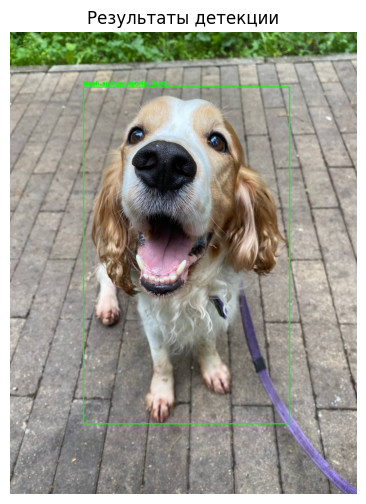

Обнаружен Welsh_springer_spaniel (0.68)

Название на русском: Валийский спрингер спаниель
Описание: Вельш-спрингер-спаниель (уэльский спаниель) – охотничья порода собак, которую периодически путают с более известными английскими спрингерами. Несмотря на общих предков, животные из Уэльса более миниатюрны.
Ссылка: https://kinpet.ru/velsh-springer-spaniel/


In [4]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd

# Загрузите обученную модель:
model = YOLO("/home/ubuntu-pc/fp/res/best.pt")

# Предскажите результаты на изображении:
results = model("/home/ubuntu-pc/fp/img/custa.jpg")

# Отрисовка bounding box и меток на изображении
img = cv2.imread("/home/ubuntu-pc/fp/img/custa.jpg")

# Отрисовка bounding box и меток на изображении
img = cv2.imread("/home/ubuntu-pc/fp/img/custa.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Преобразуем изображение в RGB для matplotlib

# Загружаем базу данных о породах
dog_breeds_df = pd.read_csv('/home/ubuntu-pc/fp/dogdf.csv')

# Подготовка текста для описания
description = []
for result in results:
    boxes = result.boxes
    labels = result.names
    for i, box in enumerate(boxes):
        # Получаем координаты bounding box в формате xyxy
        x1, y1, x2, y2 = box.xyxy[i].tolist()  # Доступ к координатам из box.xyxy
        # Находим индекс класса с максимальной уверенностью
        class_idx = int(box.cls[i])
        
        # Получаем информацию из таблицы
        label = labels[class_idx]
        label_ru = dog_breeds_df[dog_breeds_df["label_name"] == label]["label_ru"].iloc[0]
        description_text = dog_breeds_df[dog_breeds_df["label_name"] == label]["description"].iloc[0]
        link = dog_breeds_df[dog_breeds_df["label_name"] == label]["link"].iloc[0]

        # Получаем вероятность точного определения
        confidence = float(box.conf[i])

        # Формируем строку с лейблом и вероятностью
        label_with_conf = f"{label} ({confidence:.2f})"

        # Добавляем информацию в текст описания
        description.append(f"Обнаружен {label_with_conf}\n\nНазвание на русском: {label_ru}\nОписание: {description_text}\nСсылка: {link}")

        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green bounding box
        cv2.putText(img, label_with_conf, (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Отображение изображения
plt.figure(figsize=(10, 6))  # Устанавливаем размер изображения
plt.imshow(img)
plt.title("Результаты детекции")
plt.axis("off")
plt.show()

# Вывод текста с описанием отдельно
#print("\n\nОписание породы:\n")
for desc in description:
    print(desc)

In [1]:
pip uninstall aiogram

Found existing installation: aiogram 3.13.0
Uninstalling aiogram-3.13.0:
  Would remove:
    /home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages/aiogram-3.13.0.dist-info/*
    /home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages/aiogram/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show aiogram

Name: aiogram
Version: 2.25.1
Summary: Is a pretty simple and fully asynchronous framework for Telegram Bot API
Home-page: https://github.com/aiogram/aiogram
Author: Alex Root Junior
Author-email: jroot.junior@gmail.com
License: MIT
Location: /home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages
Requires: aiohttp, Babel, certifi, magic-filter
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install python-telegram-bot

  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.8/648.8 kB 8.8 MB/s eta 0:00:00
Using cached httpx-0.27.2-py3-none-any.whl (76 kB)
Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
Using cached h11-0.14.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show python-telegram-bot

Name: python-telegram-bot
Version: 21.5
Summary: We have made you a wrapper you can't refuse
Home-page: https://python-telegram-bot.org
Author: 
Author-email: Leandro Toledo <devs@python-telegram-bot.org>
License: 
Location: /home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages
Requires: httpx
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m site

sys.path = [
    '/home/ubuntu-pc/fp',
    '/home/ubuntu-pc/miniforge3/lib/python310.zip',
    '/home/ubuntu-pc/miniforge3/lib/python3.10',
    '/home/ubuntu-pc/miniforge3/lib/python3.10/lib-dynload',
    '/home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages',
]
USER_BASE: '/home/ubuntu-pc/.local' (exists)
USER_SITE: '/home/ubuntu-pc/.local/lib/python3.10/site-packages' (exists)
ENABLE_USER_SITE: False


In [11]:
pip uninstall python-telegram-bot

Found existing installation: python-telegram-bot 21.5
Uninstalling python-telegram-bot-21.5:
  Would remove:
    /home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages/python_telegram_bot-21.5.dist-info/*
    /home/ubuntu-pc/fp/project_d/lib/python3.10/site-packages/telegram/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip list

Package                  Version
------------------------ -----------
aiofiles                 23.2.1
aiogram                  2.25.1
aiohappyeyeballs         2.4.0
aiohttp                  3.8.6
aiosignal                1.3.1
annotated-types          0.7.0
anyio                    4.4.0
asttokens                2.4.1
async-timeout            4.0.3
attrs                    24.2.0
Babel                    2.9.1
certifi                  2024.8.30
charset-normalizer       3.3.2
comm                     0.2.2
contourpy                1.3.0
cycler                   0.12.1
debugpy                  1.8.5
decorator                5.1.1
exceptiongroup           1.2.2
executing                2.1.0
filelock                 3.16.0
fonttools                4.53.1
frozenlist               1.4.1
fsspec                   2024.9.0
h11                      0.14.0
httpcore                 1.0.5
httpx                    0.27.2
idna                     3.8
ipykernel                6.29.5
ipython          